# Analyse textuelle
Création des nuages de mots

In [37]:
import pandas as pd
import pickle
import numpy as np

## Chargement des données

In [118]:
data = {}
for i in range(1, 17):
    with open("Answers/" + f"Question_{i}" + ".pkl", "rb") as file:
        data[f"Question_{i}"] = pickle.load(file)

In [119]:
type(data["Question_1"])

pandas.core.series.Series

In [120]:
print(data["Question_1"].name)
print("---------------------------")
print(data["Question_1"][:5])

QUXVlc3Rpb246MTYw - Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?
---------------------------
0                                                  NaN
1    Les problèmes auxquels se trouve confronté l’e...
2      Les dérèglements climatiques (crue, sécheresse)
3                                La pollution de l'air
4    La biodiversité et la disparition de certaines...
Name: QUXVlc3Rpb246MTYw - Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?, dtype: object


### See NaN

In [121]:
for key, value in data.items():
    print(f"Number of NaN in {key}:", data[key].isna().sum(), "i.e.", round(100*data[key].isna().sum()/len(data[key]), ndigits=2), "%")

Number of NaN in Question_1: 10483 i.e. 6.82 %
Number of NaN in Question_2: 16969 i.e. 11.03 %
Number of NaN in Question_3: 15247 i.e. 9.91 %
Number of NaN in Question_4: 61024 i.e. 39.68 %
Number of NaN in Question_5: 15057 i.e. 9.79 %
Number of NaN in Question_6: 22621 i.e. 14.71 %
Number of NaN in Question_7: 33791 i.e. 21.97 %
Number of NaN in Question_8: 50568 i.e. 32.88 %
Number of NaN in Question_9: 22621 i.e. 14.71 %
Number of NaN in Question_10: 68412 i.e. 44.48 %
Number of NaN in Question_11: 17522 i.e. 11.39 %
Number of NaN in Question_12: 81089 i.e. 52.72 %
Number of NaN in Question_13: 57694 i.e. 37.51 %
Number of NaN in Question_14: 46449 i.e. 30.2 %
Number of NaN in Question_15: 40894 i.e. 26.59 %
Number of NaN in Question_16: 43246 i.e. 28.12 %


In [122]:
# Rename the questions
for key in data:
    data[key].name = data[key].name[20:-1]

In [123]:
for df in data.values():
    print(df.name)

Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement 
Que faudrait-il faire selon vous pour apporter des réponses à ce problème 
Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique 
Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique 
À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement 
Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire 
Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances 
Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements 
Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des s

## Nettoyage n°1

- On vire les lignes avec des na
- On converti tous les caractères en minuscule
- On retire la ponctuation
- On retire les mots contenant des nombres

In [124]:
import re
import string

def clean_1(df):
    question = df.name
    df.dropna(axis=0, inplace = True)
    texts = [text.lower() for text in df]
    texts = [text.replace("d'", "") for text in texts]
    texts = [text.replace("l'", "") for text in texts]
    texts = [text.replace("d’", "") for text in texts]
    texts = [text.replace("l’", "") for text in texts]
    texts = [text.replace("«", "") for text in texts]
    texts = [text.replace("»", "") for text in texts]
    texts = [text.replace("–", "") for text in texts]
    texts = [re.sub('[%s]' % re.escape(string.punctuation), '', text) for text in texts]
    texts = [re.sub('\w*\d\w*', '', text) for text in texts]
    return pd.Series(data=texts, name=question)
    

In [125]:
clean_1(data['Question_1']).head()[0]

'les problèmes auxquels se trouve confronté ensemble de la planète et que dénoncent dans le plus parfait désordre les gilets jaunes de france ne sontils pas dus avant tout à la surpopulation mondiale  cette population est passée  milliards habitants en  à  milliards en  et montera bientôt à  milliards vers   avec les progrès de la communication dans ce village mondial chaque individu du fin fond de asie au fin fond de afrique en passant par les  quartiers  et les  campagnes  de notre pays aspire à vivre  et on ne peu en blâmer  comme les moins mal lotis de nos concitoyens logement nourriture biens de consommation déplacementetc  voilà la mère de tous les problèmes si tel est bien le cas la solution à tous les problèmes stabilisation de la croissance démographique partage des richesses partage des terres partage de eau protection de la biodiversité règlement des conflits lutte contre la déforestation lutte contre dérèglement climatique règlement des conflits stabilisation des migrations

Long to run :

In [127]:
data_clean = {question : clean_1(list_answers) for question, list_answers in data.items()}

In [128]:
data_clean["Question_1"]

0         les problèmes auxquels se trouve confronté ens...
1              les dérèglements climatiques crue sécheresse
2                                       la pollution de air
3         la biodiversité et la disparition de certaines...
4                                       la pollution de air
                                ...                        
143321         les dérèglements climatiques crue sécheresse
143322    la biodiversité et la disparition de certaines...
143323    la biodiversité et la disparition de certaines...
143324    la biodiversité et la disparition de certaines...
143325         les dérèglements climatiques crue sécheresse
Name: Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement , Length: 143326, dtype: object

Remove duplicates

If the column has too few different values we keep them (yes/no answers)

In [129]:
data_clean_2 = {key : list(dict.fromkeys(list(df))) if len(list(dict.fromkeys(list(df)))) > 3 else list(df) for key, df in data_clean.items() }
for df in data_clean_2.values():
    print(len(df))

41012
132664
138562
84536
138752
126605
106447
93962
131188
75183
136287
64726
22361
68217
102164
105103


## Lemmatization

### Group all comments by question

In [109]:
def create_big_df(dico):
    questions = list(dico.keys())
    answers = [" ".join(list(list_answers)) for list_answers in dico.values()]
    df = pd.DataFrame(index=questions)
    df["Answers"] = answers
    return df


In [130]:
final_data = create_big_df(data_clean_2)
final_data.head()

,Answers
Question_1,les problèmes auxquels se trouve confronté ens...
Question_2,les problèmes auxquels se trouve confronté ens...
Question_3,non non oui oui oui oui oui oui oui non oui ou...
Question_4,pollution de air pollution de nos aliments mal...
Question_5,non non oui oui oui oui oui oui oui non oui ou...


## Document-Term matrix

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

def document_term(df):
    cv = CountVectorizer(stop_words=fr_stop)
    data_cv = cv.fit_transform(df.Answers)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
    data_dtm.index = df.index
    return data_dtm


In [132]:
data_dtm = document_term(final_data)
data_dtm.to_pickle("dtm.pkl")

c:\Users\killian.steunou\Documents\Tools\lib\site-packages\sklearn\feature_extraction\text.py:394: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn(
c:\Users\killian.steunou\Documents\Tools\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Most common words

In [133]:
data = data_dtm.transpose()
data.head()

,Question_1,Question_2,Question_3,Question_4,Question_5,Question_6,Question_7,Question_8,Question_9,Question_10,Question_11,Question_12,Question_13,Question_14,Question_15,Question_16
aa,0,8,0,2,0,4,4,3,0,1,0,2,1,1,0,5
aaa,0,6,0,0,0,15,0,4,0,0,0,0,0,1,3,4
aaaah,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
aabcd,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Find the top 30 words said for each question

In [134]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [135]:
for question, top_words in top_dict.items():
    print(question)
    print(', '.join([word for word, _ in top_words[0:14]]))
    print('---')

Question_1
pollution, air, problèmes, biodiversité, climatique, eau, disparition, problème, environnement, liés, climatiques, espèces, importants, déchets
---
Question_2
produits, faire, faut, transports, entreprises, développer, non, interdire, agriculture, consommation, taxer, pollution, mettre, favoriser
---
Question_3
oui, non, aa, poirquoi, poireau, poireautent, poireauter, poireaux, poires, poiret, poirier, poiriers, poiroux, poirson
---
Question_4
pollution, air, été, sécheresse, saisons, climatique, eau, climatiques, disparition, températures, changement, insectes, oiseaux, chaleur
---
Question_5
oui, non, aa, poirquoi, poireau, poireautent, poireauter, poireaux, poires, poiret, poirier, poiriers, poiroux, poirson
---
Question_6
déchets, produits, tri, consommation, voiture, eau, bio, transports, chauffage, vélo, commun, utilisation, déplacements, faire
---
Question_7
transports, commun, voiture, chauffage, faire, cest, transport, vélo, véhicule, faut, aides, cyclables, pistes,

In [138]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each question
words = []
for question in data.columns:
    top = [word for word, _ in top_dict[question]]
    for t in top:
        words.append(t)
        
words[:15]

['pollution',
 'air',
 'problèmes',
 'biodiversité',
 'climatique',
 'eau',
 'disparition',
 'problème',
 'environnement',
 'liés',
 'climatiques',
 'espèces',
 'importants',
 'déchets',
 'cest']

In [139]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('cest', 11),
 ('non', 11),
 ('faut', 10),
 ('faire', 10),
 ('transports', 8),
 ('voiture', 8),
 ('transport', 7),
 ('produits', 6),
 ('énergie', 6),
 ('commun', 6),
 ('solutions', 6),
 ('exemple', 5),
 ('place', 5),
 ('écologique', 5),
 ('véhicules', 5),
 ('vélo', 5),
 ('électrique', 5),
 ('pollution', 4),
 ('environnement', 4),
 ('entreprises', 4),
 ('développer', 4),
 ('consommation', 4),
 ('taxer', 4),
 ('oui', 4),
 ('aa', 4),
 ('poirquoi', 4),
 ('poireau', 4),
 ('poireautent', 4),
 ('poireauter', 4),
 ('poireaux', 4),
 ('poires', 4),
 ('poiret', 4),
 ('poirier', 4),
 ('poiriers', 4),
 ('poiroux', 4),
 ('poirson', 4),
 ('poir', 4),
 ('poirvcommuniquer', 4),
 ('pois', 4),
 ('poise', 4),
 ('poisitives', 4),
 ('poislourds', 4),
 ('poison', 4),
 ('poisonet', 4),
 ('poisonneuse', 4),
 ('poisonplastique', 4),
 ('poisons', 4),
 ('poire', 4),
 ('chauffage', 4),
 ('déplacements', 4),
 ('véhicule', 4),
 ('prix', 4),
 ('ville', 4),
 ('bus', 4),
 ('eau', 3),
 ('déchets', 3),
 ('mettre', 3),
 

In [140]:

# If more than half of the questions have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 8]
add_stop_words

['cest', 'non', 'faut', 'faire']

update document term matrix with new strop words list

In [152]:
def document_term_updated(df):
    cv = CountVectorizer(stop_words=list(fr_stop) + add_stop_words)
    data_cv = cv.fit_transform(df.Answers)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
    data_dtm.index = df.index
    return data_dtm

In [153]:
dtm_stop = document_term_updated(final_data)
dtm_stop.to_pickle("dtm_stop.pkl")

c:\Users\killian.steunou\Documents\Tools\lib\site-packages\sklearn\feature_extraction\text.py:394: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn(
c:\Users\killian.steunou\Documents\Tools\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [154]:
from wordcloud import WordCloud

stop_words = list(fr_stop) + add_stop_words

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

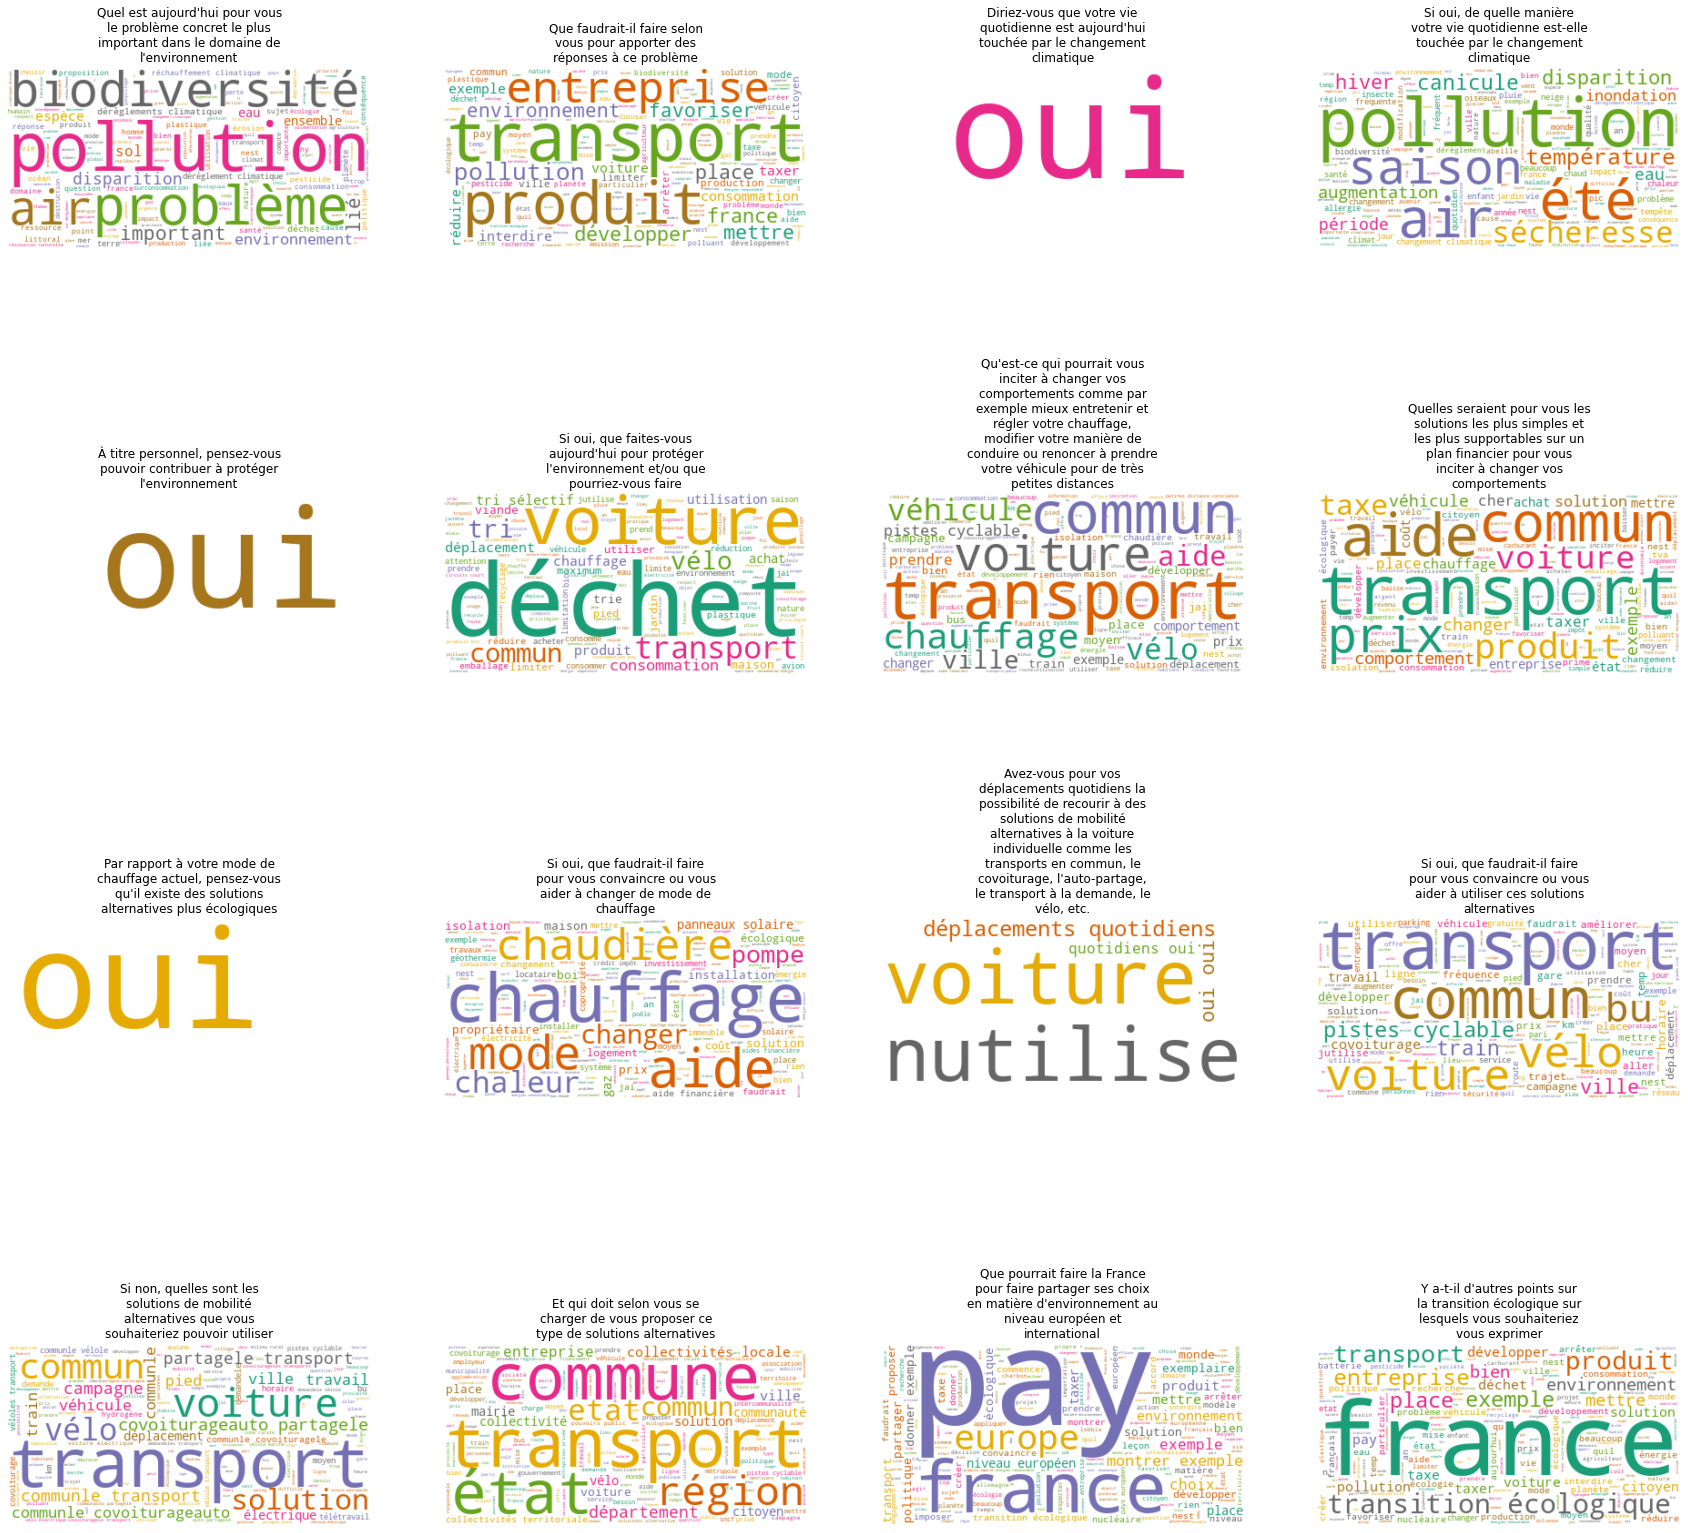

In [181]:
# Reset the output dimensions
import matplotlib.pyplot as plt
from textwrap import wrap

plt.rcParams['figure.figsize'] = [30, 30]

raw_data = {}
for i in range(1, 17):
    with open("Answers/" + f"Question_{i}" + ".pkl", "rb") as file:
        raw_data[f"Question_{i}"] = pickle.load(file)
for key in raw_data:
    raw_data[key].name = raw_data[key].name[20:-1]
full_questions = [df.name for df in raw_data.values()]

# Create subplots for each question
for index, question in enumerate(data.columns):
    wc.generate(final_data.Answers[question])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("\n".join(wrap(full_questions[index], 30)))

plt.savefig("wc_killian.png", dpi=350)    
plt.show()